# Text classification on Emotion Training 

Text classification is the process of categorizing text into organized groups. When focusing on emotion classification, the objective is to classify a given text into predefined emotional categories such as sadness, joy, love, anger, fear, and surprise. This task is a subset of sentiment analysis but focuses more on the nuanced emotional states expressed in the text.

### Here's a structured approach to building and evaluating a text classification model for emotion detection:

Step 1: Data Preparation

Loading Data: Load the dataset containing text samples and their corresponding emotion labels.

Preprocessing: Clean and preprocess the text data. Common steps include removing stop words, punctuation, and converting text to lowercase.

Label Encoding: Convert categorical emotion labels to numerical format.

Step 2: Splitting the Data
Divide the dataset into training, validation, and test sets. A common split ratio is:

Training set: 70%
Test set: 20%
Validation set: 10%

Step 3: Balancing the Dataset
Ensure the dataset is balanced so that each emotion category has an approximately equal number of samples. This can be achieved through techniques like undersampling, oversampling, or using synthetic data generation methods such as SMOTE.

Step 4: Feature Extraction
Transform the text data into numerical features using techniques like TF-IDF (Term Frequency-Inverse Document Frequency).

Step 5: Model Training
Train a classification model using machine learning algorithms such as Logistic Regression, Random Forest, Support Vector Machines, or deep learning models like LSTM or BERT.

Step 6: Model Evaluation
Evaluate the model using appropriate metrics such as accuracy, precision, recall, and F1-score. Confusion matrices are also useful for visualizing the performance of the model across different emotion categories.

Step 7: Hyperparameter Tuning
Optimize the model by tuning hyperparameters using techniques like grid search or randomized search.

Step 8: Final Model Selection
Compare the performance of different models and choose the one that performs best on the validation set.

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#text preprocesing
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Import the dataset

In [2]:
# Read the dataset
data = pd.read_csv('Emotions_training.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3


In [3]:
# Display the shape of the dataset
print("\nDataset Shape:", data.shape)



Dataset Shape: (16000, 2)


In [4]:
# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None


In [5]:

# Define emotion labels
emotion_labels = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}


# Checking dataset is balanced or imbalanced

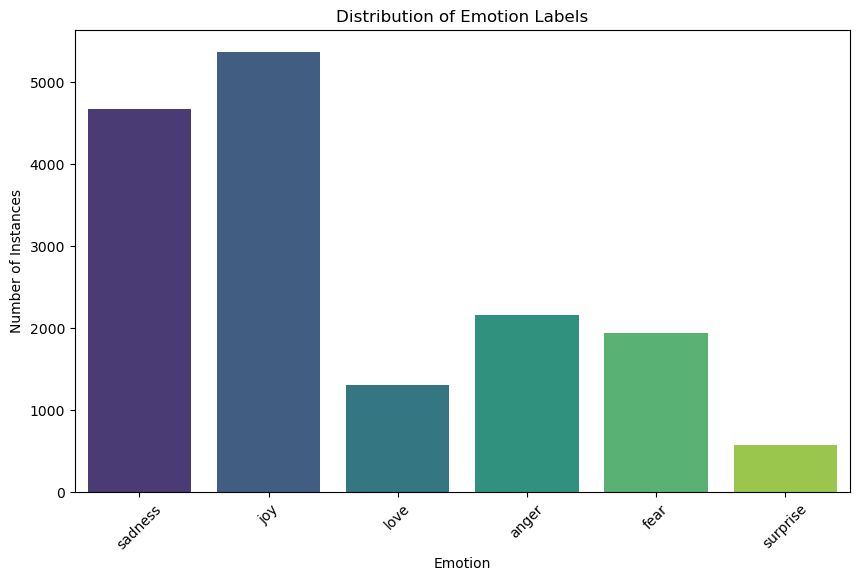

In [6]:
# Check the distribution of labels
label_counts = data['label'].value_counts().sort_index()

# Map labels to emotion names
label_counts.index = label_counts.index.map(emotion_labels)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()


The dataset is imbalanced

# Converting into Lower case

In [7]:
data['text'] = data['text'].str.lower()

# Removing the Links

In [8]:
import re
# Remove links
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Removing next lines

In [9]:
# Remove newline characters
data['text'] = data['text'].str.replace('\n', '')

# Removing words contains numbers

In [10]:
# Remove words containing numbers using regex
data['text'] = data['text'].apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))

# Removing extra spaces

In [11]:
# Remove extra spaces
data['text'] = data['text'].apply(lambda x: ' '.join(x.split()))

# Removing special characters

In [12]:
# Remove special characters
data['text'] = data['text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# Removal of Stop words

In [13]:
from gensim.parsing.preprocessing import remove_stopwords

# Remove stop words using gensim
data['text'] = data['text'].apply(remove_stopwords)

# Stemming

In [14]:
# Initialize the Porter Stemmer
porter = PorterStemmer()

# Define function to apply stemming using NLTK Porter Stemmer
def apply_stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply stemming
data['text'] = data['text'].apply(apply_stemming)

# Lemmatization

In [15]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function to apply lemmatization using NLTK WordNet Lemmatizer
def apply_lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization
data['text'] = data['text'].apply(apply_lemmatization)


# TF-IDF Vectorizer

TF-IDF Vectorizer: Converts text data into a numerical form that can be used by machine learning models. TF-IDF stands for Term Frequency-Inverse Document Frequency, which helps in reflecting the importance of a term in a document relative to the entire corpus.

Parameters: max_df and min_df help in removing very common and very rare terms, respectively, making the model more robust.

Resulting Matrix: X is the transformed text data in the form of a TF-IDF weighted term-document matrix.

Target Variable: y contains the corresponding emotion labels for each document.

This transformation is a crucial step in preparing the text data for training a machine learning model, as models require numerical input to perform any computations or make predictions.

In [16]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(data['text'])
y = data['label']

# Split the dataset

Divide the dataset into training, validation, and test sets. A common split ratio is:

Training set: 70%

Test set: 20%

Validation set: 10%

In [17]:
# Split the data into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split the temp set into validation (10% of total) and test (20% of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

# Check the distribution of the splits
print("Training set distribution:\n", pd.Series(y_train).value_counts())
print("\nValidation set distribution:\n", pd.Series(y_val).value_counts())
print("\nTest set distribution:\n", pd.Series(y_test).value_counts())

Training set distribution:
 label
1    3754
0    3266
3    1511
4    1356
2     913
5     400
Name: count, dtype: int64

Validation set distribution:
 label
1    536
0    467
3    216
4    194
2    130
5     57
Name: count, dtype: int64

Test set distribution:
 label
1    1072
0     933
3     432
4     387
2     261
5     115
Name: count, dtype: int64


# Balancing the dataset

Ensure the dataset is balanced so that each emotion category has an approximately equal number of samples. This can be achieved through techniques like undersampling, oversampling, or using synthetic data generation methods such as SMOTE.

SMOTE is a technique used to address class imbalance by generating synthetic samples for the minority class. It works by:

Selecting Minority Class Samples: Randomly choosing samples from the minority class.

Generating Synthetic Samples: Creating new synthetic samples by interpolating between a selected sample and its nearest neighbors in the feature space.

This helps in balancing the dataset by increasing the number of minority class samples, making the classifier less biased towards the majority class.

In [18]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Fit and resample the training data to create a balanced dataset
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [19]:
# Check the distribution after balancing
balanced_label_counts = pd.Series(y_train_balanced).value_counts().sort_index()
print("\nBalanced training set distribution:\n", balanced_label_counts)


Balanced training set distribution:
 label
0    3754
1    3754
2    3754
3    3754
4    3754
5    3754
Name: count, dtype: int64


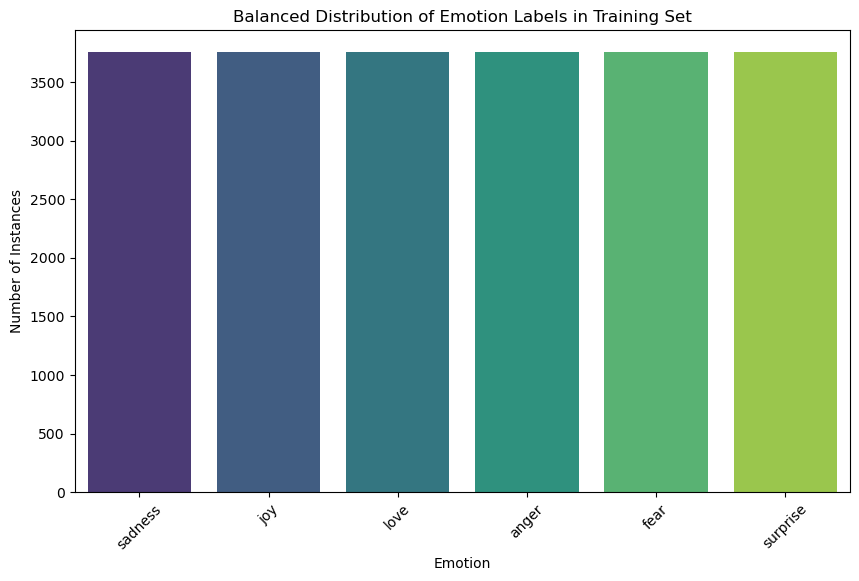

In [20]:
# Map labels to emotion names for plotting
balanced_label_counts.index = balanced_label_counts.index.map(emotion_labels)

# Plot the balanced distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=balanced_label_counts.index, y=balanced_label_counts.values, palette="viridis")
plt.title('Balanced Distribution of Emotion Labels in Training Set')
plt.xlabel('Emotion')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

# Model Building

Train a Logistic Regression model using the balanced training set.

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']  # Optimization algorithm
}

In [22]:
# Perform grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
             scoring='f1_weighted')

In [23]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 10, 'solver': 'lbfgs'}


In [24]:
# Train the best model
best_model = LogisticRegression(max_iter=1000, random_state=42, **best_params)
best_model.fit(X_train_balanced, y_train_balanced)


LogisticRegression(C=10, max_iter=1000, random_state=42)

# Predictions

In [25]:
# Predictions on training set with the best model
y_train_pred_best = best_model.predict(X_train_balanced)

# Predictions on test set with the best model
y_test_pred_best = best_model.predict(X_test)

# Evaluation

Evaluate the model's performance on both the training and test sets using classification reports and print additional performance metrics (accuracy and F1 score).

In [26]:
# Evaluation on training set with the best model
print("\nClassification Report on Training Set with Best Model:")
print(classification_report(y_train_balanced, y_train_pred_best, target_names=[emotion_labels[i] for i in range(len(emotion_labels))]))



Classification Report on Training Set with Best Model:
              precision    recall  f1-score   support

     sadness       0.99      0.98      0.99      3754
         joy       0.99      0.97      0.98      3754
        love       0.98      1.00      0.99      3754
       anger       0.99      0.99      0.99      3754
        fear       0.99      0.98      0.98      3754
    surprise       0.98      1.00      0.99      3754

    accuracy                           0.99     22524
   macro avg       0.99      0.99      0.99     22524
weighted avg       0.99      0.99      0.99     22524



In [27]:
# Evaluation on test set with the best model
print("\nClassification Report on Test Set with Best Model:")
print(classification_report(y_test, y_test_pred_best, target_names=[emotion_labels[i] for i in range(len(emotion_labels))]))


Classification Report on Test Set with Best Model:
              precision    recall  f1-score   support

     sadness       0.87      0.86      0.86       933
         joy       0.86      0.86      0.86      1072
        love       0.64      0.66      0.65       261
       anger       0.83      0.83      0.83       432
        fear       0.78      0.82      0.80       387
    surprise       0.76      0.70      0.73       115

    accuracy                           0.83      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.83      0.83      0.83      3200



# Confusion matrices

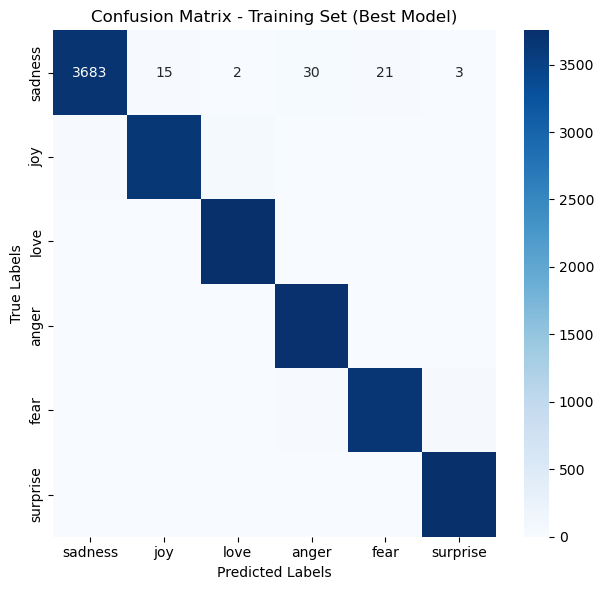

In [28]:
# Confusion matrices for the best model
train_conf_matrix_best = confusion_matrix(y_train_balanced, y_train_pred_best)
test_conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)

# Plot confusion matrices for the best model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Training Set (Best Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

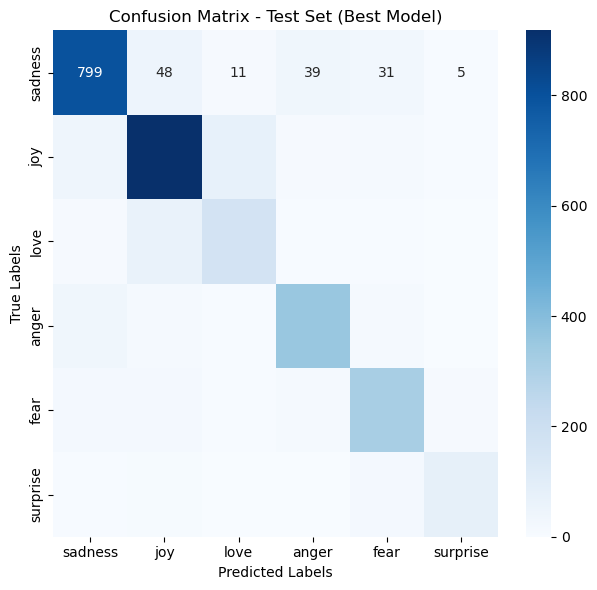

In [29]:
# Plot confusion matrices for the best model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=[emotion_labels[i] for i in range(len(emotion_labels))], yticklabels=[emotion_labels[i] for i in range(len(emotion_labels))])
plt.title('Confusion Matrix - Test Set (Best Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [31]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}


In [33]:
# Perform grid search
#grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [34]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'C': 10, 'kernel': 'linear'}


In [35]:
# Train the best model
best_svm_clf = grid_search.best_estimator_


In [36]:
# Train the best model
best_svm_clf = grid_search.best_estimator_


In [37]:
# Evaluation with the best model
print("Classification Report on Training Set with Best Model:")
print(classification_report(y_train_balanced, y_train_pred_best))


Classification Report on Training Set with Best Model:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3754
           1       0.99      0.97      0.98      3754
           2       0.98      1.00      0.99      3754
           3       0.99      0.99      0.99      3754
           4       0.99      0.98      0.98      3754
           5       0.98      1.00      0.99      3754

    accuracy                           0.99     22524
   macro avg       0.99      0.99      0.99     22524
weighted avg       0.99      0.99      0.99     22524



In [38]:
print("Classification Report on Test Set with Best Model:")
print(classification_report(y_test, y_test_pred_best))


Classification Report on Test Set with Best Model:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       933
           1       0.86      0.86      0.86      1072
           2       0.64      0.66      0.65       261
           3       0.83      0.83      0.83       432
           4       0.78      0.82      0.80       387
           5       0.76      0.70      0.73       115

    accuracy                           0.83      3200
   macro avg       0.79      0.79      0.79      3200
weighted avg       0.83      0.83      0.83      3200



In [39]:
# Confusion matrices for the best model
train_conf_matrix_best = confusion_matrix(y_train_balanced, y_train_pred_best)
test_conf_matrix_best = confusion_matrix(y_test, y_test_pred_best)

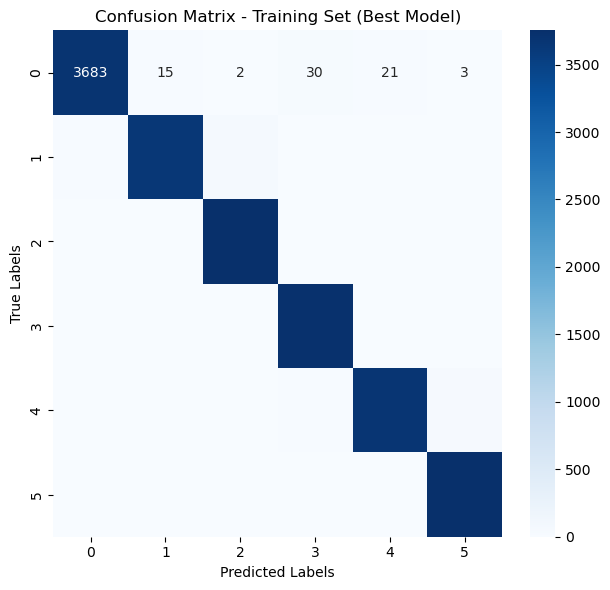

In [40]:
# Plot confusion matrices for the best model
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(train_conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set (Best Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

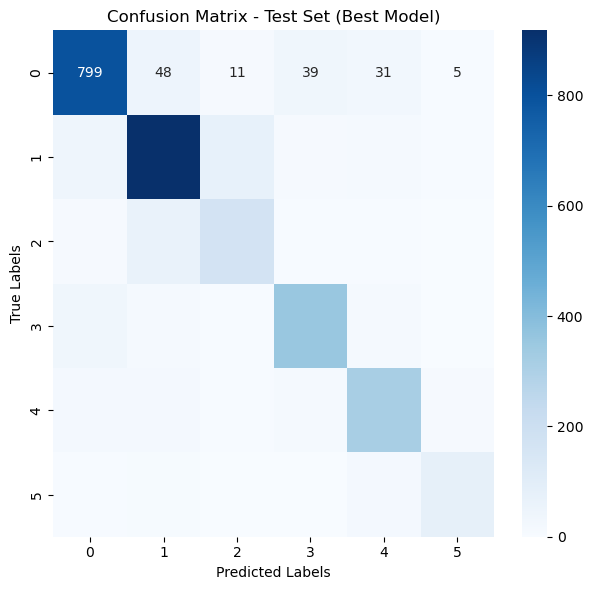

In [41]:
# Plot confusion matrices for the best model
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
sns.heatmap(test_conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (Best Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

In [42]:
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}


In [43]:
# Perform grid search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [44]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 10, 'kernel': 'linear'}


In [45]:
# Train the best model
best_svm_clf = grid_search.best_estimator_

In [46]:
# Predictions on training set with the best model
y_train_pred_svm = best_svm_clf.predict(X_train_balanced)

# Predictions on test set with the best model
y_test_pred_svm = best_svm_clf.predict(X_test)

In [47]:
# Evaluation with the best model
print("Classification Report on Training Set with Best SVM Model:")
print(classification_report(y_train_balanced, y_train_pred_svm, target_names=[emotion_labels[i] for i in range(len(emotion_labels))]))


Classification Report on Training Set with Best SVM Model:
              precision    recall  f1-score   support

     sadness       0.99      0.98      0.99      3754
         joy       1.00      0.99      0.99      3754
        love       0.99      1.00      1.00      3754
       anger       0.99      1.00      0.99      3754
        fear       0.98      0.98      0.98      3754
    surprise       0.98      1.00      0.99      3754

    accuracy                           0.99     22524
   macro avg       0.99      0.99      0.99     22524
weighted avg       0.99      0.99      0.99     22524



In [48]:
print("Classification Report on Test Set with Best SVM Model:")
print(classification_report(y_test, y_test_pred_svm, target_names=[emotion_labels[i] for i in range(len(emotion_labels))]))

Classification Report on Test Set with Best SVM Model:
              precision    recall  f1-score   support

     sadness       0.79      0.85      0.82       933
         joy       0.82      0.83      0.82      1072
        love       0.68      0.60      0.64       261
       anger       0.84      0.75      0.79       432
        fear       0.76      0.80      0.78       387
    surprise       0.79      0.63      0.71       115

    accuracy                           0.79      3200
   macro avg       0.78      0.74      0.76      3200
weighted avg       0.79      0.79      0.79      3200



In [49]:
# Confusion matrices for the best SVM model
train_conf_matrix_svm = confusion_matrix(y_train_balanced, y_train_pred_svm)
test_conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)

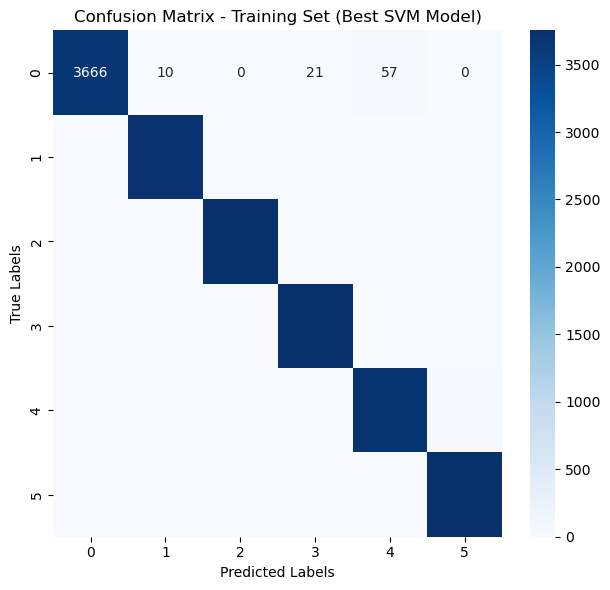

In [51]:
# Plot confusion matrices for the best SVM model
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(train_conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set (Best SVM Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.tight_layout()
plt.show()

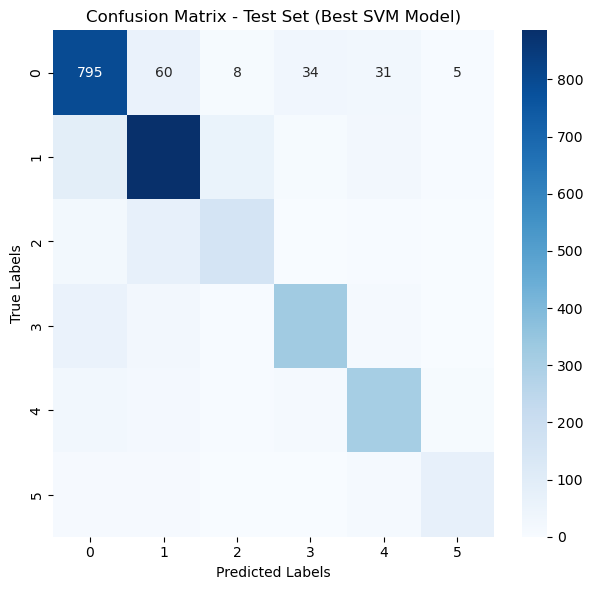

In [52]:
# Plot confusion matrices for the best SVM model
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 2)
sns.heatmap(test_conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set (Best SVM Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()